In [13]:
from importlib import reload
import json
import re

import cufflinks as cf
cf.go_offline()

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import SVG, display_html

%cd /root/rolling-pin/python
from rolling_pin import tools, utils, blob_etl, repo_etl, radon_etl
from rolling_pin.blob_etl import BlobETL
from rolling_pin.repo_etl import RepoETL
from rolling_pin.radon_etl import RadonETL
reload(tools)
reload(utils)
reload(blob_etl)
reload(repo_etl)
reload(radon_etl)

COLORS = [
    'henanigans_cyan2',
    'henanigans_red2',
    'henanigans_orange2',
    'henanigans_green2',
    'henanigans_blue2',
    'henanigans_purple2',
    'henanigans_yellow2',
    'henanigans_cyan1',
    'henanigans_red1',
    'henanigans_orange1',
]

pd.set_option('display.max_colwidth', 500)

/root/rolling-pin/python


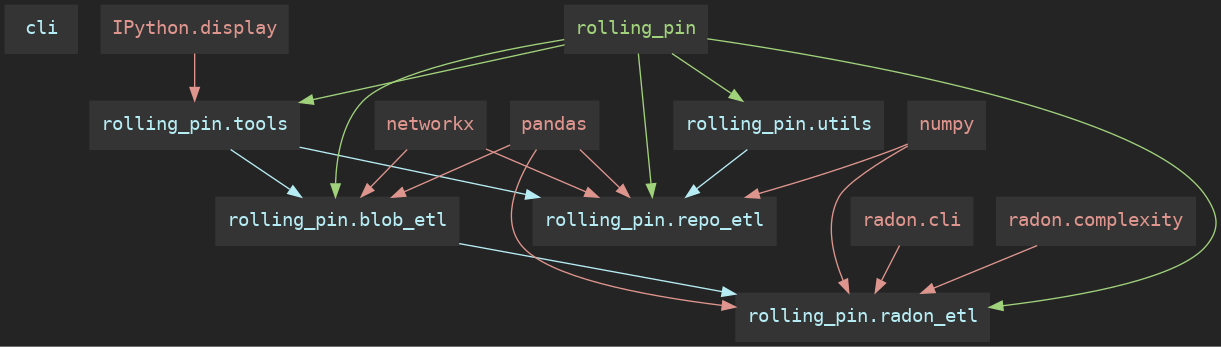

In [13]:
source = '/root/rolling-pin/python'
# d = RepoETL(source, exclude_regex='__init__')
d = RepoETL(source)
d.to_html(as_png=True)

In [14]:
d.to_dataframe()

,node_name,node_type,x,y,dependencies,subpackages,fullpath
0,cli,module,2.5,2,[],[],/root/rolling-pin/python/cli.py
1,rolling_pin.blob_etl,module,1.5,0,"[pandas, networkx, rolling_pin.tools, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/blob_etl.py
2,rolling_pin.radon_etl,module,3.5,0,"[numpy, pandas, radon.complexity, radon.cli, rolling_pin.blob_etl, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/radon_etl.py
3,rolling_pin.repo_etl,module,2.5,0,"[numpy, pandas, networkx, rolling_pin.tools, rolling_pin.utils, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/repo_etl.py
4,rolling_pin.tools,module,0.5,0,"[IPython.display, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/tools.py
5,rolling_pin.utils,module,4.5,0,[rolling_pin],[rolling_pin],/root/rolling-pin/python/rolling_pin/utils.py
6,IPython.display,library,0.0,4,[],[],NaN
7,rolling_pin,subpackage,2.5,3,[],[],NaN
8,networkx,library,1.0,4,[],[],NaN
9,numpy,library,2.0,4,[],[],NaN


In [65]:
x = '{"shape": {"rows": 1, "columns": 1, "format": "SBS96"}, "op": "liquid_handle", "locations": [{"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top", "offset": "1:millimeter"}}}}, {"volume": "-5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-5:microliter", "pump_override_volume": "-5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "5:microliter", "pump_override_volume": "5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "-2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer-Solvent Source/0"}, {"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer Reservoir/2"}], "mode": "air_displacement"}'
x = json.loads(x)

In [ ]:
curl -X GET '0.0.0.0:5000/to_svg' -d '{"data": {"bar": {"foo": 1}}, "layout": "dot"}' -H 'Content-Type: application/json'

200


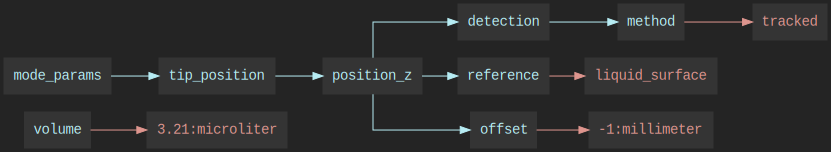

In [115]:
import requests

url = 'http://0.0.0.0:5000/to_svg'
data = {
    "data": x['locations'][1]['transports'][10],
    "layout": "dot",
    "orient": "lr",
    "orthogonal_edges": True,
#     "color_scheme": {},
}
response = requests.get(url, json=data)
print(response.status_code)
content = response.content.decode('utf-8')
SVG(content)

In [3]:
b = BlobETL(x)
b.to_html(orient='lr')
b.to_dot_g

In [58]:
leafs = ['liquid_class', 'reference', 'volume', 'method', 'offset']
for leaf in leafs:
    b = BlobETL(x)
    b = b.filter(lambda x: re.search('0>/transports', x))
    b = b.filter(lambda x: re.search(leaf, x))
    html = b.to_html(layout='dot')
    display_html(html)

<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 2.40.1 (20161225.0304) --><!-- Title: %3 Pages: 1 --> %3 <!-- root/locations --> root/locations locations <!-- root/locations/<list_0> --> root/locations/<list_0> 0 <!-- root/locations->root/locations/<list_0> --> root/locations->root/locations/<list_0> <!-- root/locations/<list_0>/transports --> root/locations/<list_0>/transports transports <!-- root/locations/<list_0>->root/locations/<list_0>/transports --> root/locations/<list_0>->root/locations/<list_0>/transports <!-- root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports/<list_1> 1 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> <!-- root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports/<list_8> 8 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> <!-- root/locations/<list_0>/transports/<list_1>/mode_params --> root/locations/<list_0>/transports/<list_1>/mode_params mode_params <!-- root/locations/<list_0>/transports/<list_1>->root/locations/<list_0>/transports/<list_1>/mode_params --> root/locations/<list_0>/transports/<list_1>->root/locations/<list_0>/transports/<list_1>/mode_params <!-- root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class --> root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class liquid_class <!-- root/locations/<list_0>/transports/<list_1>/mode_params->root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class --> root/locations/<list_0>/transports/<list_1>/mode_params->root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class <!-- root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class/air --> root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class/air air <!-- root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class->root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class/air --> root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class->root/locations/<list_0>/transports/<list_1>/mode_params/liquid_class/air <!-- root/locations/<list_0>/transports/<list_8>/mode_params --> root/locations/<list_0>/transports/<list_8>/mode_params mode_params <!-- root/locations/<list_0>/transports/<list_8>->root/locations/<list_0>/transports/<list_8>/mode_params --> root/locations/<list_0>/transports/<list_8>->root/locations/<list_0>/transports/<list_8>/mode_params <!-- root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class --> root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class liquid_class <!-- root/locations/<list_0>/transports/<list_8>/mode_params->root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class --> root/locations/<list_0>/transports/<list_8>/mode_params->root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class <!-- root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class/air --> root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class/air air <!-- root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class->root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class/air --> root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class->root/locations/<list_0>/transports/<list_8>/mode_params/liquid_class/air

<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 2.40.1 (20161225.0304) --><!-- Title: %3 Pages: 1 --> %3 <!-- root/locations --> root/locations locations <!-- root/locations/<list_0> --> root/locations/<list_0> 0 <!-- root/locations->root/locations/<list_0> --> root/locations->root/locations/<list_0> <!-- root/locations/<list_0>/transports --> root/locations/<list_0>/transports transports <!-- root/locations/<list_0>->root/locations/<list_0>/transports --> root/locations/<list_0>->root/locations/<list_0>/transports <!-- root/locations/<list_0>/transports/<list_0> --> root/locations/<list_0>/transports/<list_0> 0 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_0> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_0> <!-- root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports/<list_1> 1 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> <!-- root/locations/<list_0>/transports/<list_2> --> root/locations/<list_0>/transports/<list_2> 2 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_2> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_2> <!-- root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports/<list_3> 3 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> <!-- root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports/<list_4> 4 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> <!-- root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports/<list_5> 5 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> <!-- root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports/<list_6> 6 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> <!-- root/locations/<list_0>/transports/<list_7> --> root/locations/<list_0>/transports/<list_7> 7 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_7> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_7> <!-- root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports/<list_8> 8 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> <!-- root/locations/<list_0>/transports/<list_0>/mode_params --> root/locations/<list_0>/transports/<list_0>/mode_params mode_params <!-- root/locations/<list_0>/transports/<list_0>->root/locations/<list_0>/transports/<list_0>/mode_params --> root/locations/<list_0>/transports/<list_0>->root/locations/<list_0>/transports/<list_0>/mode_params <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position tip_position <!-- root/locations/<list_0>/transports/<list_0>/mode_params->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_0>/mode_params->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z position_z <!-- root/locations/<list_0>/transpor

<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 2.40.1 (20161225.0304) --><!-- Title: %3 Pages: 1 --> %3 <!-- root/locations --> root/locations locations <!-- root/locations/<list_0> --> root/locations/<list_0> 0 <!-- root/locations->root/locations/<list_0> --> root/locations->root/locations/<list_0> <!-- root/locations/<list_0>/transports --> root/locations/<list_0>/transports transports <!-- root/locations/<list_0>->root/locations/<list_0>/transports --> root/locations/<list_0>->root/locations/<list_0>/transports <!-- root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports/<list_1> 1 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_1> <!-- root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports/<list_4> 4 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> <!-- root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports/<list_5> 5 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> <!-- root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports/<list_6> 6 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> <!-- root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports/<list_8> 8 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_8> <!-- root/locations/<list_0>/transports/<list_1>/volume --> root/locations/<list_0>/transports/<list_1>/volume volume <!-- root/locations/<list_0>/transports/<list_1>->root/locations/<list_0>/transports/<list_1>/volume --> root/locations/<list_0>/transports/<list_1>->root/locations/<list_0>/transports/<list_1>/volume <!-- root/locations/<list_0>/transports/<list_1>/volume/-5:microliter --> root/locations/<list_0>/transports/<list_1>/volume/-5:microliter -5:microliter <!-- root/locations/<list_0>/transports/<list_1>/volume->root/locations/<list_0>/transports/<list_1>/volume/-5:microliter --> root/locations/<list_0>/transports/<list_1>/volume->root/locations/<list_0>/transports/<list_1>/volume/-5:microliter <!-- root/locations/<list_0>/transports/<list_4>/volume --> root/locations/<list_0>/transports/<list_4>/volume volume <!-- root/locations/<list_0>/transports/<list_4>->root/locations/<list_0>/transports/<list_4>/volume --> root/locations/<list_0>/transports/<list_4>->root/locations/<list_0>/transports/<list_4>/volume <!-- root/locations/<list_0>/transports/<list_4>/pump_override_volume --> root/locations/<list_0>/transports/<list_4>/pump_override_volume pump_override_volume <!-- root/locations/<list_0>/transports/<list_4>->root/locations/<list_0>/transports/<list_4>/pump_override_volume --> root/locations/<list_0>/transports/<list_4>->root/locations/<list_0>/transports/<list_4>/pump_override_volume <!-- root/locations/<list_0>/transports/<list_4>/volume/-5:microliter --> root/locations/<list_0>/transports/<list_4>/volume/-5:microliter -5:microliter <!-- root/locations/<list_0>/transports/<list_4>/volume->root/locations/<list_0>/transports/<list_4>/volume/-5:microliter --> root/locations/<list_0>/transports/<list_4>/volume->root/locations/<list_0>/transports/<list_4>/volume/-5:microliter <!-- root/locations/<list_0>/transports/<list_4>/pump_override_volume/-5:microliter --> root/locations/<list_0>/transports/<list_4>/pump_override_volume/-5:microliter -5:microliter <!-- root/locations/<list_0>/transports/<list_4>/pump_

<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 2.40.1 (20161225.0304) --><!-- Title: %3 Pages: 1 --> %3 <!-- root/locations --> root/locations locations <!-- root/locations/<list_0> --> root/locations/<list_0> 0 <!-- root/locations->root/locations/<list_0> --> root/locations->root/locations/<list_0> <!-- root/locations/<list_0>/transports --> root/locations/<list_0>/transports transports <!-- root/locations/<list_0>->root/locations/<list_0>/transports --> root/locations/<list_0>->root/locations/<list_0>/transports <!-- root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports/<list_3> 3 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> <!-- root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports/<list_4> 4 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> <!-- root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports/<list_5> 5 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> <!-- root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports/<list_6> 6 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> <!-- root/locations/<list_0>/transports/<list_3>/mode_params --> root/locations/<list_0>/transports/<list_3>/mode_params mode_params <!-- root/locations/<list_0>/transports/<list_3>->root/locations/<list_0>/transports/<list_3>/mode_params --> root/locations/<list_0>/transports/<list_3>->root/locations/<list_0>/transports/<list_3>/mode_params <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position tip_position <!-- root/locations/<list_0>/transports/<list_3>/mode_params->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_3>/mode_params->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z position_z <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection detection <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection/method --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection/method method <!-- root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection->root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection/method --> root/locations/<list_0>/transports/<list_3>/mode_params/tip_position/position_z/detection->root/locations/<list

<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"><!-- Generated by graphviz version 2.40.1 (20161225.0304) --><!-- Title: %3 Pages: 1 --> %3 <!-- root/locations --> root/locations locations <!-- root/locations/<list_0> --> root/locations/<list_0> 0 <!-- root/locations->root/locations/<list_0> --> root/locations->root/locations/<list_0> <!-- root/locations/<list_0>/transports --> root/locations/<list_0>/transports transports <!-- root/locations/<list_0>->root/locations/<list_0>/transports --> root/locations/<list_0>->root/locations/<list_0>/transports <!-- root/locations/<list_0>/transports/<list_0> --> root/locations/<list_0>/transports/<list_0> 0 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_0> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_0> <!-- root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports/<list_3> 3 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_3> <!-- root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports/<list_4> 4 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_4> <!-- root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports/<list_5> 5 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_5> <!-- root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports/<list_6> 6 <!-- root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> --> root/locations/<list_0>/transports->root/locations/<list_0>/transports/<list_6> <!-- root/locations/<list_0>/transports/<list_0>/mode_params --> root/locations/<list_0>/transports/<list_0>/mode_params mode_params <!-- root/locations/<list_0>/transports/<list_0>->root/locations/<list_0>/transports/<list_0>/mode_params --> root/locations/<list_0>/transports/<list_0>->root/locations/<list_0>/transports/<list_0>/mode_params <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position tip_position <!-- root/locations/<list_0>/transports/<list_0>/mode_params->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position --> root/locations/<list_0>/transports/<list_0>/mode_params->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z position_z <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset offset <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z->root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset <!-- root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset/1:millimeter --> root/locations/<list_0>/transports/<list_0>/mode_params/tip_position/position_z/offset/1:millimeter 1:millimeter <!-- root/locations/<list_0>/transports/<li

In [2]:
src = '/root/rolling-pin/python'
repo = RadonETL(src)
data = repo.data